# Jim Haines & Josh McCoy
# Madness of March
### [Project Website](https://joshmccoy2.github.io/NCAA_March_Madness/)
### [Project Writeup](https://docs.google.com/document/d/1C9FaOyjY2SxX8GeMs-P5Bh7i4-NTTIAxikybMCfJDcQ/edit?usp=sharing)
### [Pitch Slide](https://docs.google.com/presentation/d/1rfwEKVtp47pwfxAcYXfq9TbwZCgx3hwdcOnqeyRasVI/edit?usp=sharing)

## Collaboration Plan

For this project, we decided to setup a private Github repository to allow for collaboration. We plan to work together whenever possible, but we are also capabale of working independently of each other as long as we communicate and our work is well documented. We aim to meet multiple times a week to work on our project, but we can meet more often if necessary. We plan on using libraries like matplotlib and seaborn, we have used both of these already, and more in out final tutorial to make meaningful visualizations. In all, we hope to be able to work with each other and outside sources to determine the best model to predict March Maddnes Tournament winners.

## Project overview and our goals

You should remove any data sources or questions that are not being used and you should now have a focused discussion at the top of your notebook on what questions you will attack and a discussion of why the data you are using is correct. 


The main goal of our project is to outperform other competitors in the March Machine Learning Mania 2023 Kaggle competition. The goal of this competition is to create a model that can most accurately and confidently identify the winner of each game in the men's and women's NCAA basketball tournament. We also aim to eventually provide an interactive dashboard that will allow users to choose their own factors to see if they can outperform our design. This is a process that we would complete after participating in the competition.
 

We plan to use data from multiple external sources to improve our model past the given Kaggle data. So far, we have performed EDA on two new datasets from ESPN and FiveThirtyEight. These datsets provide different ratings for teams, so we hope to incorporate these ratings into our model.

We also plan to eventually add individual player data to further improve our model. This would allow us to include features like number of 4 and 5 star recruits on a team, for example.

In the end, we plan to combine all of these datasets into our final model that will be selected based on our testing.

Since the data for the 2023 March Maddness competition has not yet been released, we are currently working with data from the 2022 competition. Although there are some changes from 2022 (Brier score, combining men's and women's competition) the data provided should be in a very similar format. Below we have included links to 3 previos competitions.

[2019 Competition](https://www.kaggle.com/competitions/mens-machine-learning-competition-2019)

[2021 Competition](https://www.kaggle.com/competitions/ncaam-march-mania-2021)

[2022 Competition](https://www.kaggle.com/competitions/mens-march-mania-2022)

## Step 1: ETL

In [2]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import requests
import numpy as np
from io import StringIO
from io import StringIO
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import brier_score_loss, accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

We can first look at how some basic factors affect the amount the winning team wins by. We want to look at the difference in score to see how dominant a team is against a competitor. A team who wins by a lot is typically a sign that this team is significantly better than its oponent.

In [3]:
# To do this we can look at regular season game stats
detailed_results_data = 'MRegularSeasonDetailedResults.csv'
detailed_results = pd.read_csv(detailed_results_data)
detailed_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,98,1400,79,1242,76,H,0,28,67,...,13,15,23,5,24,10,15,3,5,21
100419,2022,98,1411,66,1126,63,A,0,24,59,...,21,15,24,5,23,10,19,13,2,23
100420,2022,98,1422,68,1441,49,A,0,23,56,...,24,8,11,10,18,5,16,8,2,12
100421,2022,98,1438,69,1181,68,A,0,31,65,...,17,18,22,11,25,14,14,3,9,11



Let's check the datatypes

In [4]:
detailed_results.dtypes

Season      int64
DayNum      int64
WTeamID     int64
WScore      int64
LTeamID     int64
LScore      int64
WLoc       object
NumOT       int64
WFGM        int64
WFGA        int64
WFGM3       int64
WFGA3       int64
WFTM        int64
WFTA        int64
WOR         int64
WDR         int64
WAst        int64
WTO         int64
WStl        int64
WBlk        int64
WPF         int64
LFGM        int64
LFGA        int64
LFGM3       int64
LFGA3       int64
LFTM        int64
LFTA        int64
LOR         int64
LDR         int64
LAst        int64
LTO         int64
LStl        int64
LBlk        int64
LPF         int64
dtype: object

All the dtypes look correct, so lets move on to our analysis

In [5]:
# Create variable for amount by which winning team wins
detailed_results['SCOREDIFF'] = detailed_results['WScore'] - detailed_results['LScore']

When you see W or L this stands for Winning or Losing team.

In [6]:
# Winner stats
detailed_results.dtypes
detailed_results['WFGPCT'] = detailed_results['WFGM']/detailed_results['WFGA']       # field goal pt completion %
detailed_results['W3PCT'] = detailed_results['WFGM3']/detailed_results['WFGA3']      # 3 pt completion %
detailed_results['WFTPCT'] = detailed_results['WFTM']/detailed_results['WFTA']       # free throw completion %

detailed_results['WORBCHANCE'] =  detailed_results['WOR'] + detailed_results['LDR']  # total potential rebounds
detailed_results['WORPCT'] = detailed_results['WOR']/detailed_results['WORBCHANCE']  # rebound completion %

In [7]:
# Losing stats
detailed_results['LFGPCT'] = detailed_results['LFGM']/detailed_results['LFGA']       
detailed_results['L3PCT'] = detailed_results['LFGM3']/detailed_results['LFGA3']
detailed_results['LFTPCT'] = detailed_results['LFTM']/detailed_results['LFTA']

detailed_results['LORBCHANCE'] =  detailed_results['LOR'] + detailed_results['WDR']
detailed_results['LORPCT'] = detailed_results['LOR']/detailed_results['LORBCHANCE']

We can now take a more detailed look at the correlation between winner field goal % and score difference.

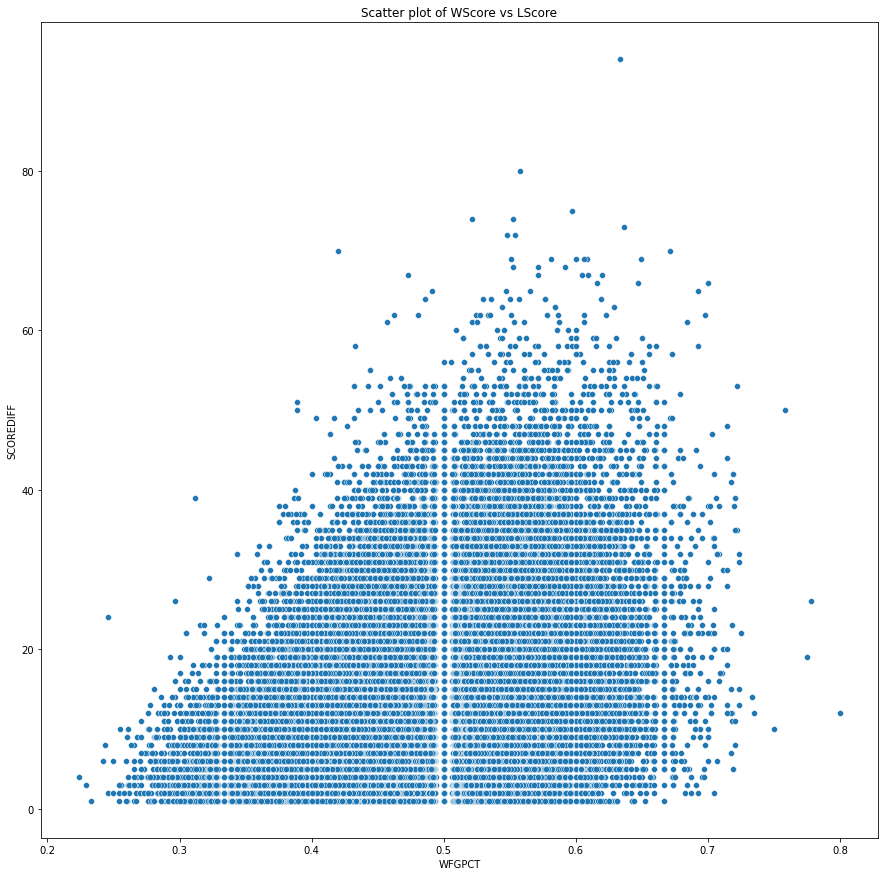

In [8]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='WFGPCT', y='SCOREDIFF', data=detailed_results)
#sns.relplot(x = 'Height', y = 'Weight', data=df)

plt.title('Scatter plot of WScore vs LScore')
plt.xlabel('WFGPCT')
plt.ylabel('SCOREDIFF')
plt.show()

We can look at other factors as well:

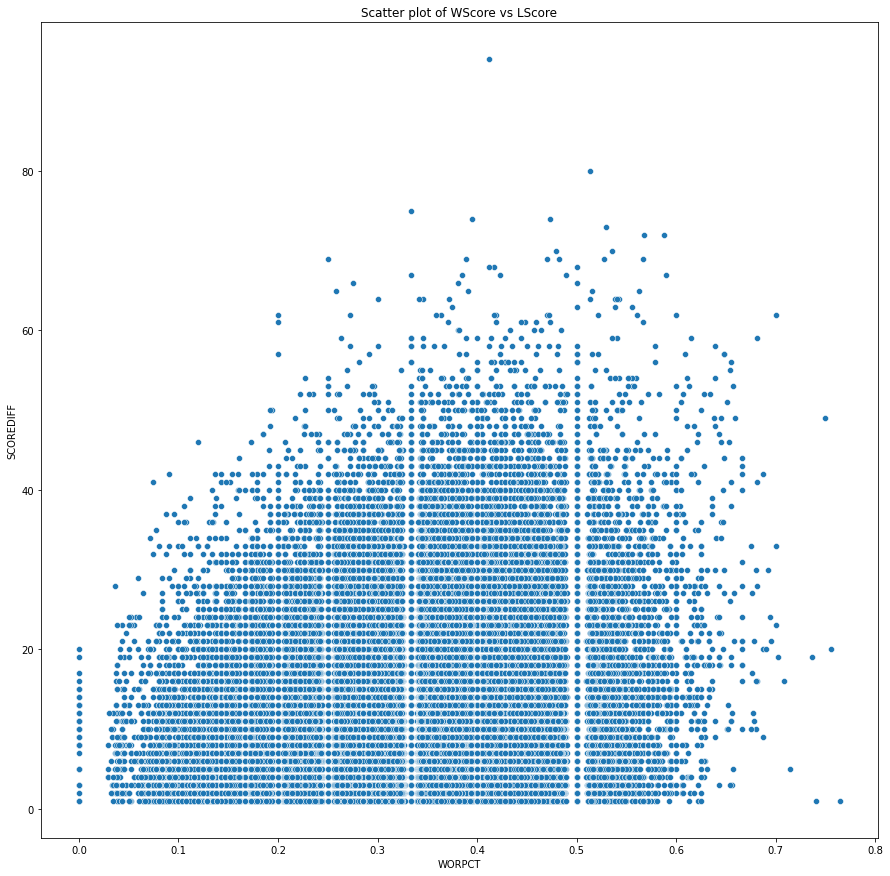

In [9]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='WORPCT', y='SCOREDIFF', data=detailed_results)
#sns.relplot(x = 'Height', y = 'Weight', data=df)

plt.title('Scatter plot of WScore vs LScore')
plt.xlabel('WORPCT')
plt.ylabel('SCOREDIFF')
plt.show()

Despite the common phrase "board man gets paid", we can see that there is a less strong correlation between rebound % and score difference. Perhaps this saying holds more true a higher level of play.

We can also take a look at detailed results from the actual tournament to see if there are any obvious differences from the regular season data. To do this we can replicate the above regular season analysis.

In [10]:
detailed_tourney_data = 'MNCAATourneyDetailedResults.csv'
detailed_tourney_results = pd.read_csv(detailed_tourney_data)
detailed_tourney_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0,33,66,...,15,14,19,7,20,9,9,7,0,13
1177,2021,148,1417,51,1276,49,N,0,21,54,...,11,6,11,8,24,12,14,5,3,11
1178,2021,152,1124,78,1222,59,N,0,29,55,...,19,11,16,13,12,10,10,4,5,10
1179,2021,152,1211,93,1417,90,N,1,37,63,...,17,14,21,7,24,21,9,4,1,16


In [11]:
detailed_tourney_results.dtypes

Season      int64
DayNum      int64
WTeamID     int64
WScore      int64
LTeamID     int64
LScore      int64
WLoc       object
NumOT       int64
WFGM        int64
WFGA        int64
WFGM3       int64
WFGA3       int64
WFTM        int64
WFTA        int64
WOR         int64
WDR         int64
WAst        int64
WTO         int64
WStl        int64
WBlk        int64
WPF         int64
LFGM        int64
LFGA        int64
LFGM3       int64
LFGA3       int64
LFTM        int64
LFTA        int64
LOR         int64
LDR         int64
LAst        int64
LTO         int64
LStl        int64
LBlk        int64
LPF         int64
dtype: object

In [12]:
# Create variable for amount by which winning team wins
detailed_tourney_results['SCOREDIFF'] = detailed_tourney_results['WScore'] - detailed_tourney_results['LScore']

In [13]:
# Winner stats
detailed_tourney_results.dtypes
detailed_tourney_results['WFGPCT'] = detailed_tourney_results['WFGM']/detailed_tourney_results['WFGA']       # field goal pt completion %
detailed_tourney_results['W3PCT'] = detailed_tourney_results['WFGM3']/detailed_tourney_results['WFGA3']      # 3 pt completion %
detailed_tourney_results['WFTPCT'] = detailed_tourney_results['WFTM']/detailed_tourney_results['WFTA']       # free throw completion %

detailed_tourney_results['WORBCHANCE'] =  detailed_tourney_results['WOR'] + detailed_tourney_results['LDR']  # total potential rebounds
detailed_tourney_results['WORPCT'] = detailed_tourney_results['WOR']/detailed_tourney_results['WORBCHANCE']  # rebound completion %

In [14]:
# Losing stats
detailed_tourney_results['LFGPCT'] = detailed_tourney_results['LFGM']/detailed_tourney_results['LFGA']       
detailed_tourney_results['L3PCT'] = detailed_tourney_results['LFGM3']/detailed_tourney_results['LFGA3']
detailed_tourney_results['LFTPCT'] = detailed_tourney_results['LFTM']/detailed_tourney_results['LFTA']

detailed_tourney_results['LORBCHANCE'] =  detailed_tourney_results['LOR'] + detailed_tourney_results['WDR']
detailed_tourney_results['LORPCT'] = detailed_tourney_results['LOR']/detailed_tourney_results['LORBCHANCE']

In [15]:
detailed_tourney_results.dtypes

Season          int64
DayNum          int64
WTeamID         int64
WScore          int64
LTeamID         int64
LScore          int64
WLoc           object
NumOT           int64
WFGM            int64
WFGA            int64
WFGM3           int64
WFGA3           int64
WFTM            int64
WFTA            int64
WOR             int64
WDR             int64
WAst            int64
WTO             int64
WStl            int64
WBlk            int64
WPF             int64
LFGM            int64
LFGA            int64
LFGM3           int64
LFGA3           int64
LFTM            int64
LFTA            int64
LOR             int64
LDR             int64
LAst            int64
LTO             int64
LStl            int64
LBlk            int64
LPF             int64
SCOREDIFF       int64
WFGPCT        float64
W3PCT         float64
WFTPCT        float64
WORBCHANCE      int64
WORPCT        float64
LFGPCT        float64
L3PCT         float64
LFTPCT        float64
LORBCHANCE      int64
LORPCT        float64
dtype: obj

In [16]:
detailed_tourney_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,WFGPCT,W3PCT,WFTPCT,WORBCHANCE,WORPCT,LFGPCT,L3PCT,LFTPCT,LORBCHANCE,LORPCT
0,2003,134,1421,92,1411,84,N,1,32,69,...,0.463768,0.379310,0.653846,42,0.333333,0.432836,0.387097,0.451613,47,0.361702
1,2003,136,1112,80,1436,51,N,0,31,66,...,0.469697,0.304348,0.785714,37,0.297297,0.312500,0.250000,1.000000,44,0.181818
2,2003,136,1113,84,1272,71,N,0,31,59,...,0.525424,0.428571,0.727273,32,0.312500,0.362319,0.250000,0.666667,47,0.425532
3,2003,136,1141,79,1166,73,N,0,29,53,...,0.547170,0.428571,0.720000,28,0.392857,0.450000,0.411765,0.705882,34,0.411765
4,2003,136,1143,76,1301,74,N,1,27,64,...,0.421875,0.350000,0.652174,44,0.409091,0.446429,0.428571,0.750000,30,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0,33,66,...,0.500000,0.333333,0.705882,31,0.354839,0.387097,0.266667,0.736842,34,0.205882
1177,2021,148,1417,51,1276,49,N,0,21,54,...,0.388889,0.230769,0.857143,30,0.200000,0.392157,0.272727,0.545455,29,0.275862
1178,2021,152,1124,78,1222,59,N,0,29,55,...,0.527273,0.458333,0.692308,23,0.478261,0.381818,0.315789,0.687500,30,0.433333
1179,2021,152,1211,93,1417,90,N,1,37,63,...,0.587302,0.333333,0.600000,28,0.142857,0.576271,0.470588,0.666667,26,0.269231


# Model Testing

First, we want to format a dataframe that we can use. To do this, we took the above `detailed_tourney_results` df and split it up so that each row is a team, and we added an outcome variable indicating a win or loss. This will allow us to predict an outcome per team, which is what we will ultimately be doing to the competition.

In [17]:
# Create a new data frame for winning teams
df_winning = detailed_tourney_results[['Season', 'DayNum', 'NumOT', 'SCOREDIFF'] + [col for col in detailed_tourney_results.columns if col.startswith('W')]].copy()
df_winning['Outcome'] = 1
df_winning['Outcome'] = df_winning['Outcome'].astype(int)


# Create a new data frame for losing teams
df_losing = detailed_tourney_results[['Season', 'DayNum', 'NumOT', 'SCOREDIFF'] + [col for col in detailed_tourney_results.columns if col.startswith('L')]].copy()
df_losing['Outcome'] = 0
df_losing['Outcome'] = df_losing['Outcome'].astype(int)

print("Winning Team Data Frame:")
print(df_winning.head())
print("\nLosing Team Data Frame:")
print(df_losing.head())

Winning Team Data Frame:
   Season  DayNum  NumOT  SCOREDIFF  WTeamID  WScore WLoc  WFGM  WFGA  WFGM3  \
0    2003     134      1          8     1421      92    N    32    69     11   
1    2003     136      0         29     1112      80    N    31    66      7   
2    2003     136      0         13     1113      84    N    31    59      6   
3    2003     136      0          6     1141      79    N    29    53      3   
4    2003     136      1          2     1143      76    N    27    64      7   

   ...  WTO  WStl  WBlk  WPF    WFGPCT     W3PCT    WFTPCT  WORBCHANCE  \
0  ...   12     5     3   22  0.463768  0.379310  0.653846          42   
1  ...   16    10     7    8  0.469697  0.304348  0.785714          37   
2  ...    9     7     4   19  0.525424  0.428571  0.727273          32   
3  ...   18    13     1   19  0.547170  0.428571  0.720000          28   
4  ...   13     8     2   14  0.421875  0.350000  0.652174          44   

     WORPCT  Outcome  
0  0.333333        1  
1  

In [18]:
# Remove the 'W' or 'L' prefix from the column names
df_winning.columns = [col[1:] if col.startswith('W') else col for col in df_winning.columns]
df_losing.columns = [col[1:] if col.startswith('L') else col for col in df_losing.columns]

# Combine the two DataFrames
combined_df = pd.concat([df_winning, df_losing], ignore_index=True)

print("Combined Data Frame:")
combined_df

Combined Data Frame:


,Season,DayNum,NumOT,SCOREDIFF,TeamID,Score,Loc,FGM,FGA,FGM3,...,TO,Stl,Blk,PF,FGPCT,3PCT,FTPCT,ORBCHANCE,ORPCT,Outcome
0,2003,134,1,8,1421,92,N,32,69,11,...,12,5,3,22,0.463768,0.379310,0.653846,42,0.333333,1
1,2003,136,0,29,1112,80,N,31,66,7,...,16,10,7,8,0.469697,0.304348,0.785714,37,0.297297,1
2,2003,136,0,13,1113,84,N,31,59,6,...,9,7,4,19,0.525424,0.428571,0.727273,32,0.312500,1
3,2003,136,0,6,1141,79,N,29,53,3,...,18,13,1,19,0.547170,0.428571,0.720000,28,0.392857,1
4,2003,136,1,2,1143,76,N,27,64,7,...,13,8,2,14,0.421875,0.350000,0.652174,44,0.409091,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2021,148,0,19,1425,66,NaN,24,62,4,...,9,7,0,13,0.387097,0.266667,0.736842,34,0.205882,0
2358,2021,148,0,2,1276,49,NaN,20,51,3,...,14,5,3,11,0.392157,0.272727,0.545455,29,0.275862,0
2359,2021,152,0,19,1222,59,NaN,21,55,6,...,10,4,5,10,0.381818,0.315789,0.687500,30,0.433333,0
2360,2021,152,1,3,1417,90,NaN,34,59,8,...,9,4,1,16,0.576271,0.470588,0.666667,26,0.269231,0


In [19]:
print(combined_df.columns)

Index(['Season', 'DayNum', 'NumOT', 'SCOREDIFF', 'TeamID', 'Score', 'Loc',
       'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO',
       'Stl', 'Blk', 'PF', 'FGPCT', '3PCT', 'FTPCT', 'ORBCHANCE', 'ORPCT',
       'Outcome'],
      dtype='object')


In [20]:
# Select rows where season is 2003 and DayNum is 134 as a test
selected_rows = combined_df[(combined_df['Season'] == 2003) & (combined_df['DayNum'] == 134)]

# Display the selected rows
print("Selected Rows:")
selected_rows

Selected Rows:


,Season,DayNum,NumOT,SCOREDIFF,TeamID,Score,Loc,FGM,FGA,FGM3,...,TO,Stl,Blk,PF,FGPCT,3PCT,FTPCT,ORBCHANCE,ORPCT,Outcome
0,2003,134,1,8,1421,92,N,32,69,11,...,12,5,3,22,0.463768,0.379310,0.653846,42,0.333333,1
1181,2003,134,1,8,1411,84,NaN,29,67,12,...,15,5,0,22,0.432836,0.387097,0.451613,47,0.361702,0


## Logistic Regression

In [21]:
# List to keep track of scores and number of games for each season
season_scores = []

# Iterate through each season
for season in range(2003, 2022):
    season_data = combined_df[combined_df['Season'] == season]
    
    # Check if there is data for this season
    if season_data.empty:
        print(f"No data available for season {season}. Skipping...")
        continue  # Skip to the next iteration of the loop
    
    features = ['SCOREDIFF', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'FGPCT', '3PCT', 'FTPCT', 'ORBCHANCE', 'ORPCT']
    X = season_data[features]
    y = season_data['Outcome']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create the logistic regression model
    log_reg = LogisticRegression()
    
    log_reg.fit(X_train_scaled, y_train)
    
    y_pred = log_reg.predict(X_test_scaled)
    
    # Calculate and store the scores and number of games for this season
    num_games = X_test.shape[0]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
    
    # Calculate Brier score
    brier_score = brier_score_loss(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
    
    # Append the scores and number of games for this season, including Brier score
    season_scores.append((season, num_games, accuracy, precision, recall, f1, roc_auc, brier_score))

# Convert the scores to a DataFrame for easier viewing
log_reg_score_df = pd.DataFrame(season_scores, columns=['Season', 'Number of Games', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Brier Score'])

# Now, log_reg_score_df should have one row per season, with the Brier score included
log_reg_score_df

No data available for season 2020. Skipping...


,Season,Number of Games,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
0,2003,26,0.807692,0.833333,0.769231,0.800000,0.857988,0.149250
1,2004,26,0.884615,0.916667,0.846154,0.880000,0.982249,0.075055
2,2005,26,0.884615,0.857143,0.923077,0.888889,0.952663,0.118377
3,2006,26,0.807692,0.900000,0.692308,0.782609,0.911243,0.128573
4,2007,26,0.846154,0.846154,0.846154,0.846154,0.958580,0.092579
5,2008,26,0.884615,0.916667,0.846154,0.880000,0.964497,0.094407
6,2009,26,0.846154,0.846154,0.846154,0.846154,0.911243,0.118216
7,2010,26,0.730769,0.687500,0.846154,0.758621,0.875740,0.175924
8,2011,27,0.740741,0.916667,0.647059,0.758621,0.847059,0.196949
9,2012,27,0.888889,0.888889,0.941176,0.914286,0.964706,0.085833


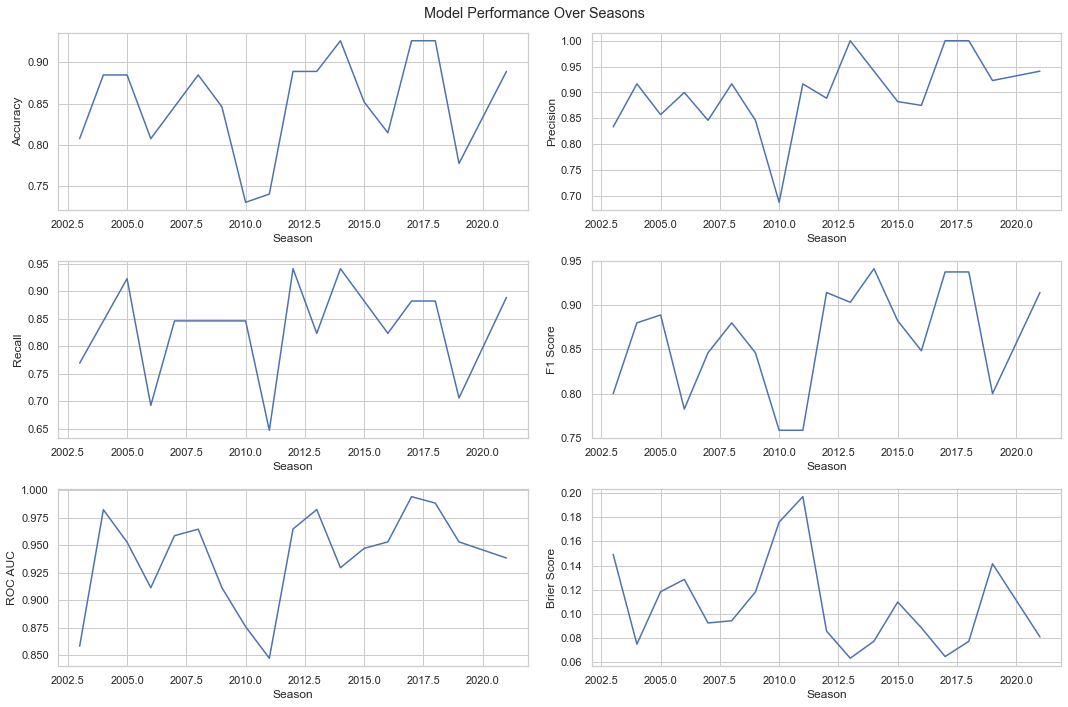

In [22]:
# Plot metrics accross seasons
sns.set(style="whitegrid")

# Formatting
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Model Performance Over Seasons')

# Plot each metric
sns.lineplot(x='Season', y='Accuracy', data=log_reg_score_df, ax=axes[0, 0])
sns.lineplot(x='Season', y='Precision', data=log_reg_score_df, ax=axes[0, 1])
sns.lineplot(x='Season', y='Recall', data=log_reg_score_df, ax=axes[1, 0])
sns.lineplot(x='Season', y='F1 Score', data=log_reg_score_df, ax=axes[1, 1])
sns.lineplot(x='Season', y='ROC AUC', data=log_reg_score_df, ax=axes[2, 0])
sns.lineplot(x='Season', y='Brier Score', data=log_reg_score_df, ax=axes[2, 1])

plt.tight_layout()
plt.show()

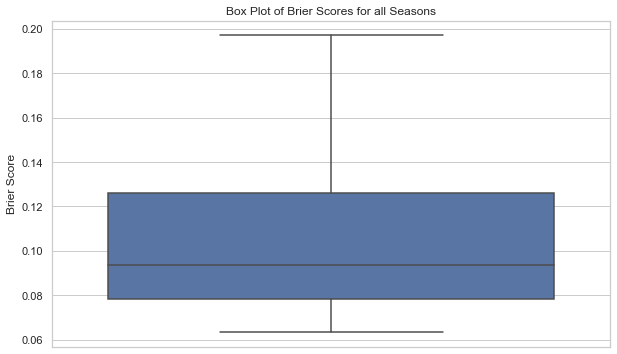

In [23]:
# Plot Brier Score accross all seasons

plt.figure(figsize=(10, 6))
sns.boxplot(y='Brier Score', data=log_reg_score_df)
plt.title('Box Plot of Brier Scores for all Seasons')
plt.show()

## Linear Regression

In [24]:
# List to keep track of error metrics for each season
error_metrics = []

# Iterate through each season
for season in range(2003, 2022):
    # Filter the data for the current season
    season_data = combined_df[combined_df['Season'] == season]
    
    # Check if there is data for this season
    if season_data.empty:
        print(f"No data available for season {season}. Skipping...")
        continue  # Skip to the next iteration of the loop
    
    # Select features and target variable
    features = ['SCOREDIFF', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'FGPCT', '3PCT', 'FTPCT', 'ORBCHANCE', 'ORPCT']
    X = season_data[features]
    y = season_data['Outcome']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create the linear regression model
    lin_reg = LinearRegression()
    
    # Fit the model to the training data
    lin_reg.fit(X_train_scaled, y_train)
    
    # Predict the outcomes on the testing data
    y_pred = lin_reg.predict(X_test_scaled)
    
    # Since linear regression might produce predictions outside [0,1], clip them
    y_pred_clipped = y_pred.clip(0, 1)
    
    # Calculate error metrics and append to list
    brier_score = brier_score_loss(y_test, y_pred_clipped)
    mae = mean_absolute_error(y_test, y_pred_clipped)
    mse = mean_squared_error(y_test, y_pred_clipped)
    r2 = r2_score(y_test, y_pred_clipped)
    
    error_metrics.append((season, brier_score, mae, mse, r2))

# Convert to a DataFrame for easier viewing
error_metrics_df = pd.DataFrame(error_metrics, columns=['Season', 'Brier Score', 'Mean Absolute Error', 'Mean Squared Error', 'R-squared'])

error_metrics_df

No data available for season 2020. Skipping...


,Season,Brier Score,Mean Absolute Error,Mean Squared Error,R-squared
0,2003,0.132491,0.289282,0.132491,0.470036
1,2004,0.080070,0.208392,0.080070,0.679722
2,2005,0.117691,0.261676,0.117691,0.529237
3,2006,0.106748,0.238844,0.106748,0.573009
4,2007,0.092415,0.205323,0.092415,0.630342
5,2008,0.091118,0.210247,0.091118,0.635530
6,2009,0.128885,0.230623,0.128885,0.484459
7,2010,0.135393,0.260360,0.135393,0.458428
8,2011,0.195811,0.331321,0.195811,0.160315
9,2012,0.101516,0.231867,0.101516,0.564677


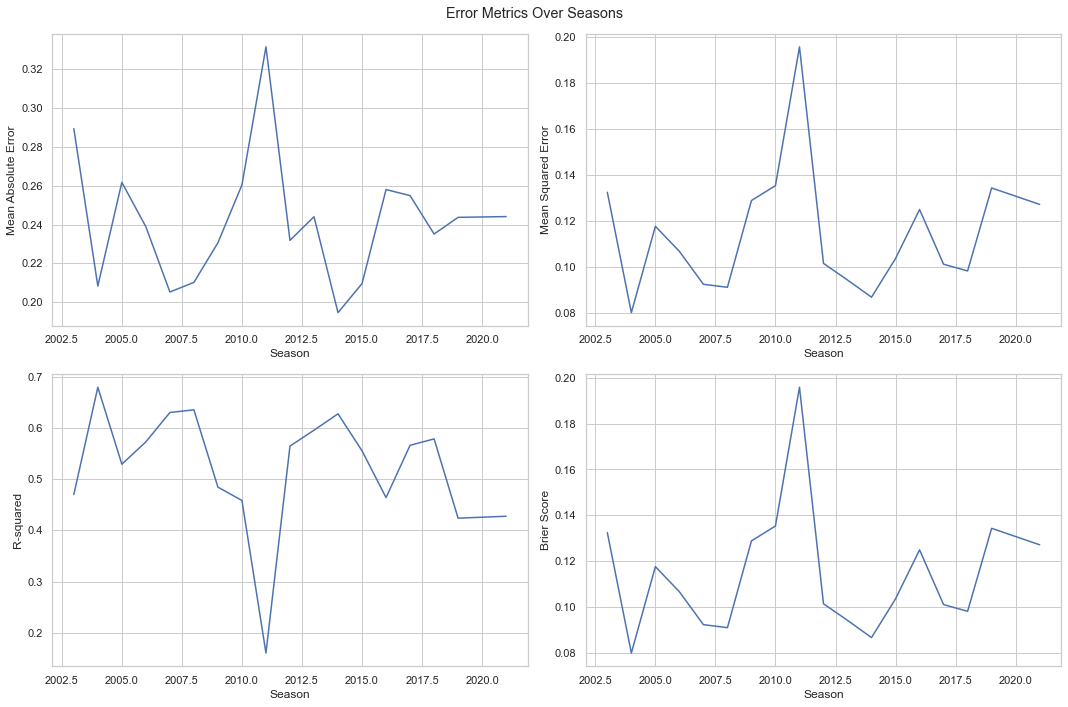

In [25]:
# Plot metrics accross seasons

sns.set(style="whitegrid")

# Formatting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Error Metrics Over Seasons')

# Plot each metric
sns.lineplot(x='Season', y='Mean Absolute Error', data=error_metrics_df, ax=axes[0, 0])
sns.lineplot(x='Season', y='Mean Squared Error', data=error_metrics_df, ax=axes[0, 1])
sns.lineplot(x='Season', y='R-squared', data=error_metrics_df, ax=axes[1, 0])
sns.lineplot(x='Season', y='Brier Score', data=error_metrics_df, ax=axes[1, 1])


plt.tight_layout()
plt.show()

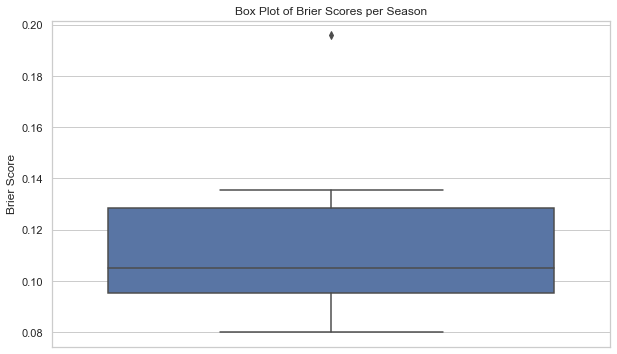

In [26]:
# Plot Brier Score accross all seasons

plt.figure(figsize=(10, 6))
sns.boxplot(y='Brier Score', data=error_metrics_df)
plt.title('Box Plot of Brier Scores per Season')
plt.show()

## XGBoost

In [27]:
# List to keep track of scores for each season
season_scores = []

# Iterate through each season
for season in range(2003, 2022):
    # Filter the data for the current season
    season_data = combined_df[combined_df['Season'] == season]
    
    # Check if there is data for this season
    if season_data.empty:
        print(f"No data available for season {season}. Skipping...")
        continue  # Skip to the next iteration of the loop
    
    # Select features and target variable
    features = ['SCOREDIFF', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'FGPCT', '3PCT', 'FTPCT', 'ORBCHANCE', 'ORPCT']
    X = season_data[features]
    y = season_data['Outcome']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create the XGBoost model
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
    # Fit the model to the training data
    xgb_model.fit(X_train_scaled, y_train)
    
    # Predict the outcomes on the testing data
    y_pred = xgb_model.predict(X_test_scaled)
    
    # Calculate and store the scores for this season
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
    
    # Calculate Brier score
    brier_score = brier_score_loss(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
    
    # Append the scores and Brier score for this season
    season_scores.append((season, accuracy, precision, recall, f1, roc_auc, brier_score))

# Convert the scores to a DataFrame for easier viewing
xgb_score_df = pd.DataFrame(season_scores, columns=['Season', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Brier Score'])

# Now, xgb_score_df should have one row per season, with the Brier score included
xgb_score_df


No data available for season 2020. Skipping...


,Season,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
0,2003,0.615385,0.636364,0.538462,0.583333,0.639053,0.297081
1,2004,0.923077,0.866667,1.000000,0.928571,0.988166,0.044538
2,2005,0.769231,0.705882,0.923077,0.800000,0.834320,0.203220
3,2006,0.769231,0.818182,0.692308,0.750000,0.822485,0.168238
4,2007,0.884615,0.857143,0.923077,0.888889,0.899408,0.115216
5,2008,0.923077,1.000000,0.846154,0.916667,0.940828,0.079880
6,2009,0.807692,0.833333,0.769231,0.800000,0.899408,0.129000
7,2010,0.884615,1.000000,0.769231,0.869565,0.905325,0.112279
8,2011,0.740741,1.000000,0.588235,0.740741,0.847059,0.224492
9,2012,0.814815,0.875000,0.823529,0.848485,0.929412,0.116222


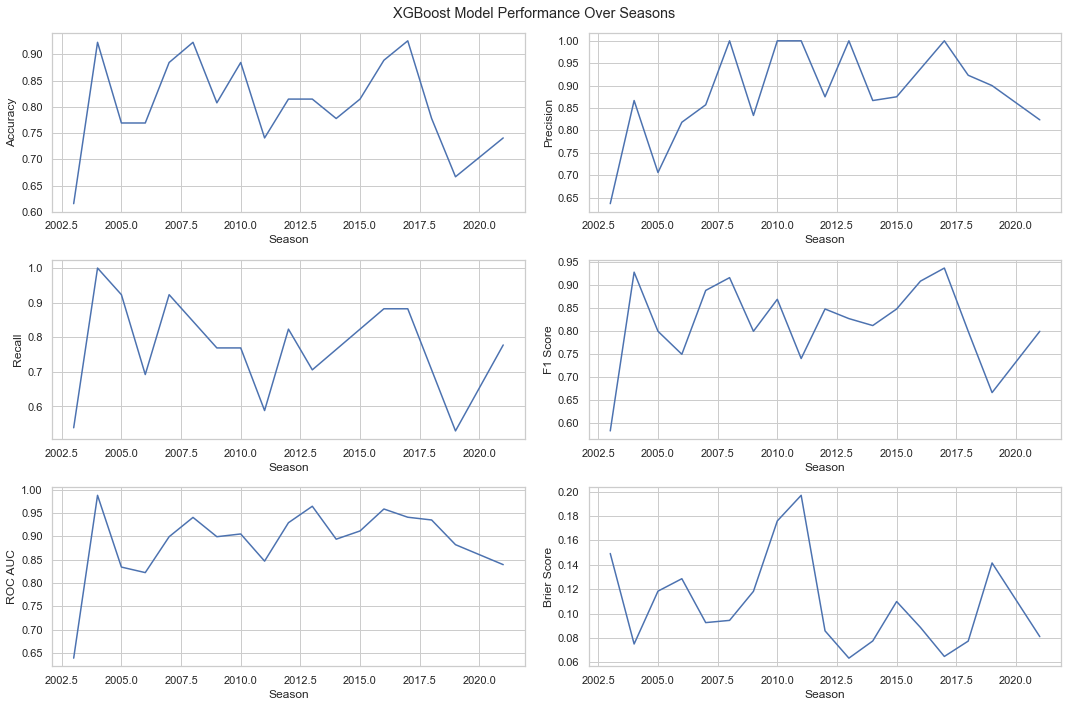

In [28]:
# Plot metrics accross seasons

# Formatting
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('XGBoost Model Performance Over Seasons')

# Plot each metric
sns.lineplot(x='Season', y='Accuracy', data=xgb_score_df, ax=axes[0, 0])
sns.lineplot(x='Season', y='Precision', data=xgb_score_df, ax=axes[0, 1])
sns.lineplot(x='Season', y='Recall', data=xgb_score_df, ax=axes[1, 0])
sns.lineplot(x='Season', y='F1 Score', data=xgb_score_df, ax=axes[1, 1])
sns.lineplot(x='Season', y='ROC AUC', data=xgb_score_df, ax=axes[2, 0])
sns.lineplot(x='Season', y='Brier Score', data=log_reg_score_df, ax=axes[2, 1])


plt.tight_layout()
plt.show()

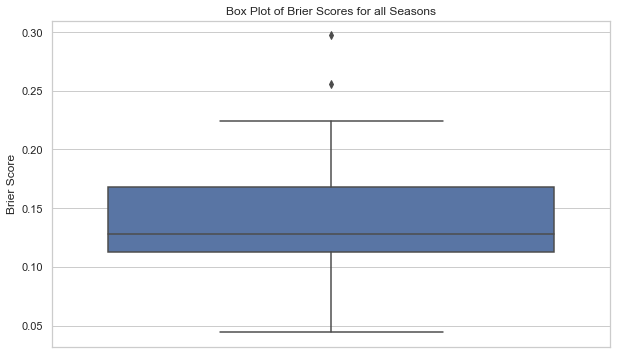

In [29]:
# Plot Brier Score accross all seasons

plt.figure(figsize=(10, 6))
sns.boxplot(y='Brier Score', data=xgb_score_df)
plt.title('Box Plot of Brier Scores for all Seasons')
plt.show()

## Model Comparison

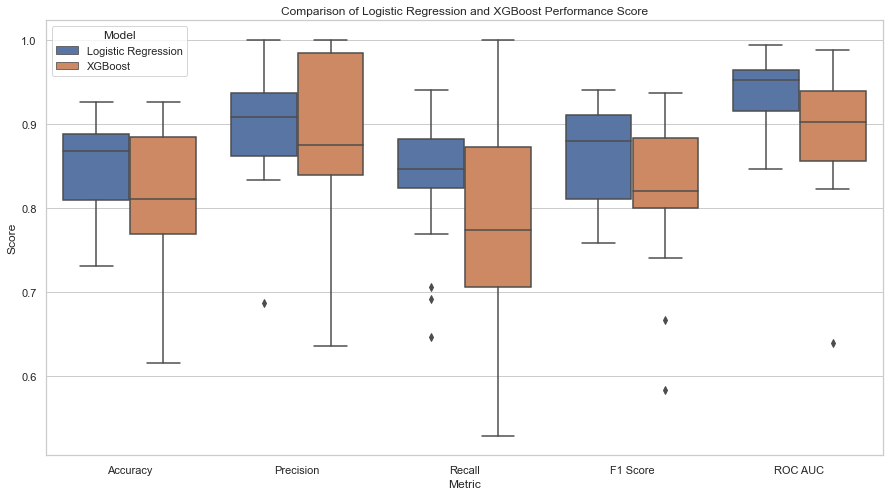

In [30]:
# Melt the dataframes 

log_reg_melted = log_reg_score_df.melt(id_vars=['Season'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], 
                                       var_name='Metric', value_name='Score')

log_reg_melted['Model'] = 'Logistic Regression'

xgb_melted = xgb_score_df.melt(id_vars=['Season'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], 
                               var_name='Metric', value_name='Score')
xgb_melted['Model'] = 'XGBoost'

# Combine the melted dataframes
combined_melted = pd.concat([log_reg_melted, xgb_melted])

# Create the box plots
plt.figure(figsize=(15, 8))
sns.boxplot(x='Metric', y='Score', hue='Model', data=combined_melted)
plt.title('Comparison of Logistic Regression and XGBoost Performance Score')
plt.show()


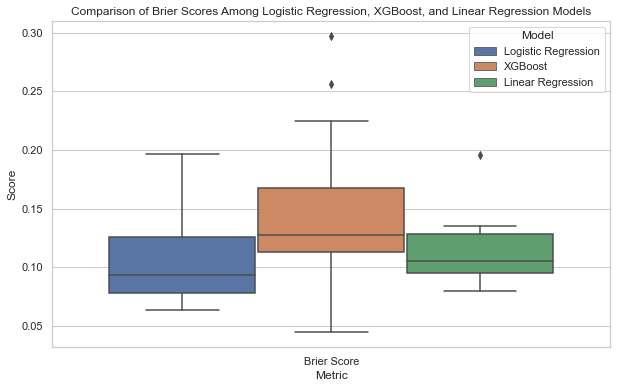

In [31]:
# Compare Brier Score across 3 models
brier_score_column_name = 'Brier Score'  

# Melt the dataframes
log_reg_melted = log_reg_score_df.melt(id_vars=['Season'], value_vars=[brier_score_column_name], 
                                       var_name='Metric', value_name='Score')

log_reg_melted['Model'] = 'Logistic Regression'

xgb_melted = xgb_score_df.melt(id_vars=['Season'], value_vars=[brier_score_column_name], 
                               var_name='Metric', value_name='Score')
xgb_melted['Model'] = 'XGBoost'

lin_reg_melted = error_metrics_df.melt(id_vars=['Season'], value_vars=[brier_score_column_name], 
                                       var_name='Metric', value_name='Score')

lin_reg_melted['Model'] = 'Linear Regression'

# Combine all the melted dataframes
combined_melted = pd.concat([log_reg_melted, xgb_melted, lin_reg_melted])

# Create the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', hue='Model', data=combined_melted)
plt.title('Comparison of Brier Scores Among Logistic Regression, XGBoost, and Linear Regression Models')
plt.show()

# EDA of Additional Datasets

## FiveThirtyEight NCAA Ratings 

In [32]:
# List of URLs
urls = [
    'https://projects.fivethirtyeight.com/march-madness-api/2016/fivethirtyeight_ncaa_forecasts.csv',
    'https://projects.fivethirtyeight.com/march-madness-api/2017/fivethirtyeight_ncaa_forecasts.csv',
    'https://projects.fivethirtyeight.com/march-madness-api/2018/fivethirtyeight_ncaa_forecasts.csv',
    'https://projects.fivethirtyeight.com/march-madness-api/2019/fivethirtyeight_ncaa_forecasts.csv',
    'https://projects.fivethirtyeight.com/march-madness-api/2021/fivethirtyeight_ncaa_forecasts.csv',
    'https://projects.fivethirtyeight.com/march-madness-api/2022/fivethirtyeight_ncaa_forecasts.csv',
    'https://projects.fivethirtyeight.com/march-madness-api/2023/fivethirtyeight_ncaa_forecasts.csv'
]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the URLs
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        # Read content of response into a pandas DataFrame
        data = StringIO(response.text)
        df = pd.read_csv(data)
        # Append the DataFrame to the list
        dfs.append(df)
    else:
        print(f'Failed to retrieve data from {url}. Status code: {response.status_code}')

# Concatenate all the DataFrames in the list into one DataFrame
FiveThirtyEight_df = pd.concat(dfs, ignore_index=True)

# Reorder columns
#cols = ['gender', 'team_name', 'team_id', 'team_rating', 'team_seed', 'team_region', 'results_to', 'team_slot', 'team_alive', 'rd1_win', 'rd2_win', 'rd3_win', 'rd4_win', 'rd5_win', 'rd6_win', 'rd7_win', 'playin_flag', 'forecast_date']
#combined_df = combined_df[cols]

# Display df
FiveThirtyEight_df.head()

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed,results_to,team_slot
0,mens,2016-03-14,0,1.0,0.990271,0.860311,0.686794,0.453952,0.321699,0.192031,1,2305,Kansas,94.46,South,1,NaN,NaN
1,mens,2016-03-14,0,1.0,0.988535,0.909507,0.609258,0.436424,0.258876,0.149509,1,153,North Carolina,93.94,East,1,NaN,NaN
2,mens,2016-03-14,0,1.0,0.982578,0.803809,0.517678,0.303557,0.172238,0.098119,1,258,Virginia,92.46,Midwest,1,NaN,NaN
3,mens,2016-03-14,0,1.0,0.948519,0.776298,0.594762,0.339378,0.172701,0.089329,1,127,Michigan State,91.84,Midwest,2,NaN,NaN
4,mens,2016-03-14,0,1.0,0.958583,0.821330,0.533420,0.319701,0.142933,0.068137,1,201,Oklahoma,89.96,West,2,NaN,NaN


From this dataset, we are really only interested in the team ratings, so we will drop all irrelvant columns and keep what we need

In [33]:
# Keep relevant columns
columns_to_keep = ['team_name', 'team_id','team_rating', 'team_region', 'team_seed']
FiveThirtyEight_df = FiveThirtyEight_df[columns_to_keep]

In [34]:
FiveThirtyEight_df.head()

,team_name,team_id,team_rating,team_region,team_seed
0,Kansas,2305,94.46,South,1
1,North Carolina,153,93.94,East,1
2,Virginia,258,92.46,Midwest,1
3,Michigan State,127,91.84,Midwest,2
4,Oklahoma,201,89.96,West,2


In [35]:
FiveThirtyEight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team_name    10476 non-null  object 
 1   team_id      10476 non-null  int64  
 2   team_rating  10476 non-null  float64
 3   team_region  10476 non-null  object 
 4   team_seed    10476 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 409.3+ KB


In [36]:
for column in ['team_id', 'team_name', 'team_region', 'team_seed']:
    print(f"Unique values in {column}: {FiveThirtyEight_df[column].nunique()}")
    print(FiveThirtyEight_df[column].value_counts().head(), '\n')

Unique values in team_id: 250
2250    147
239     145
251     133
2633    133
120     133
Name: team_id, dtype: int64 

Unique values in team_name: 250
Gonzaga      147
Baylor       145
Texas        133
Tennessee    133
Maryland     133
Name: team_name, dtype: int64 

Unique values in team_region: 25
East          1470
West          1422
South         1376
Midwest       1376
Bridgeport     524
Name: team_region, dtype: int64 

Unique values in team_seed: 22
1     628
9     628
15    628
13    628
14    628
Name: team_seed, dtype: int64 



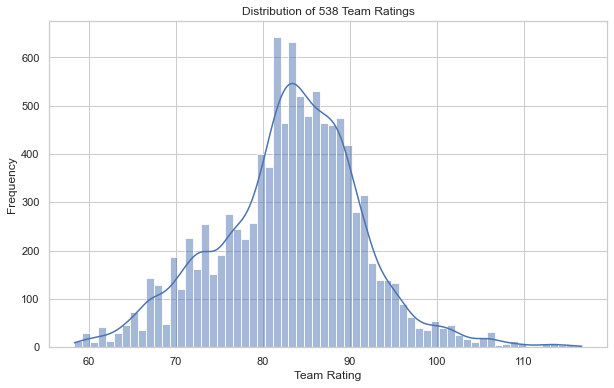

In [37]:
# Graph histogram of 538 team ratings

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(FiveThirtyEight_df['team_rating'], kde=True)
plt.title('Distribution of 538 Team Ratings')
plt.xlabel('Team Rating')
plt.ylabel('Frequency')
plt.show()

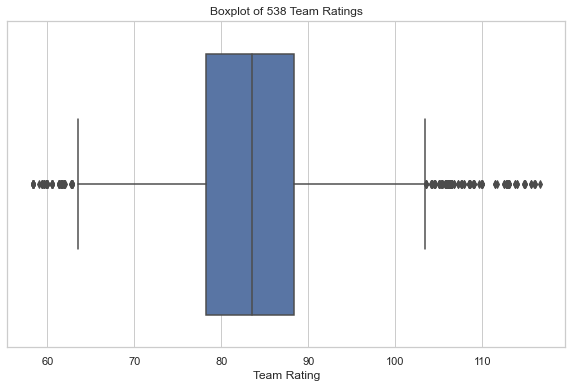

In [38]:
# Boxplot of 538 team ratings

plt.figure(figsize=(10, 6))
sns.boxplot(x=FiveThirtyEight_df['team_rating'])
plt.title('Boxplot of 538 Team Ratings')
plt.xlabel('Team Rating')
plt.show()

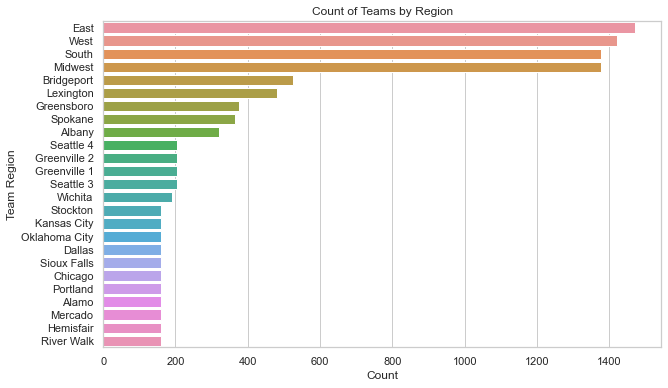

In [39]:
# Team region distribution

plt.figure(figsize=(10, 6))
sns.countplot(y='team_region', data=FiveThirtyEight_df, order = FiveThirtyEight_df['team_region'].value_counts().index)
plt.title('Count of Teams by Region')
plt.xlabel('Count')
plt.ylabel('Team Region')
plt.show()

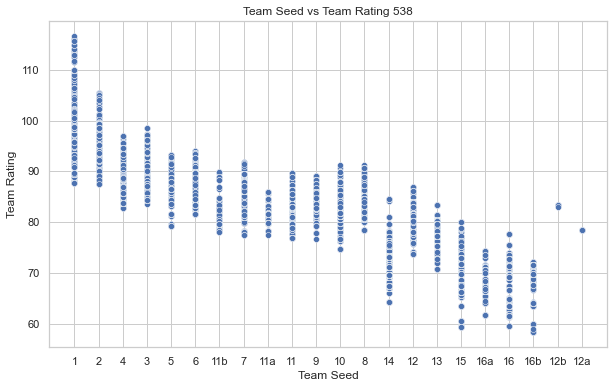

In [40]:
# Scatter plot of team seed vs team rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='team_seed', y='team_rating', data=FiveThirtyEight_df)
plt.title('Team Seed vs Team Rating 538')
plt.xlabel('Team Seed')
plt.ylabel('Team Rating')
plt.show()

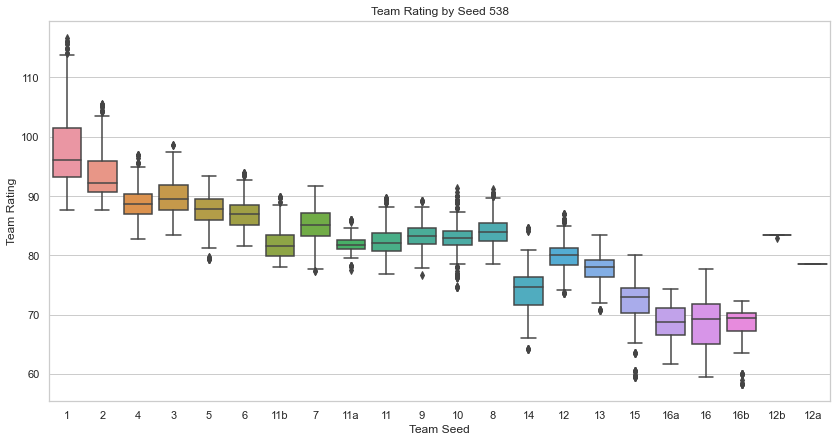

In [41]:
# Box plot of how seeds compare with team rating

plt.figure(figsize=(14, 7))
sns.boxplot(x='team_seed', y='team_rating', data=FiveThirtyEight_df)
plt.title('Team Rating by Seed 538')
plt.xlabel('Team Seed')
plt.ylabel('Team Rating')
plt.show()

In [42]:
# Convert team_seed to a numeric type if it's not already
FiveThirtyEight_df['team_seed'] = pd.to_numeric(FiveThirtyEight_df['team_seed'], errors='coerce')

# Calculate the correlation coefficient
print(FiveThirtyEight_df[['team_rating', 'team_seed']].corr())

             team_rating  team_seed
team_rating     1.000000  -0.890901
team_seed      -0.890901   1.000000


Here, we expect a negative correlation because a lower seed indicates a better team, and a higher rating also indicates a better team. 

These graphs reveal that the rating system is at least a reasonable metric of a team. We can see that the rating corresponds with factors that we would expect it to like team seed. Now, we will incorporate these rating into our model 

## ESPN BPI 2008 - 2018

In [43]:
espn_bpi_data = 'ESPN_BPI.csv'
espn_bpi = pd.read_csv(espn_bpi_data)
espn_bpi

,Rk,Team,Conf,W-L,BPI Off,BPI Def,BPI,Year
0,1,Kansas,Big 12,37-3,12.4,9.6,21.9,2008
1,2,North Carolina,ACC,36-3,19.2,1.0,20.2,2008
2,3,Memphis,C-USA,38-2,11.3,8.0,19.3,2008
3,4,UCLA,Pac-12,35-4,7.9,10.9,18.9,2008
4,5,Duke,ACC,28-6,13.8,4.3,18.2,2008
...,...,...,...,...,...,...,...,...
3814,347,Mississippi Valley St.,SWAC,28-Apr,-9.9,-6.5,-16.3,2018
3815,348,Chicago St.,WAC,29-Mar,-7.5,-9.0,-16.5,2018
3816,349,Delaware St.,MEAC,28-Apr,-9.4,-8.5,-18.0,2018
3817,350,Alabama A&M,SWAC,28-Mar,-11.7,-7.4,-19.1,2018


**Basketball Power Index (BPI)** measures a team's true strength going forward; expected point margin per 70 possessions vs an average opponent on a neutral court. 

BPI = BPI OFF + BPI DEF

In [44]:
espn_bpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       3819 non-null   int64  
 1   Team     3819 non-null   object 
 2   Conf     3819 non-null   object 
 3   W-L      3819 non-null   object 
 4   BPI Off  3819 non-null   float64
 5   BPI Def  3819 non-null   float64
 6   BPI      3819 non-null   float64
 7   Year     3819 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 238.8+ KB


In [45]:
espn_bpi.describe()

,Rk,BPI Off,BPI Def,BPI,Year
count,3819.000000,3819.000000,3819.000000,3819.000000,3819.000000
mean,174.157895,0.043755,0.051532,0.096779,2013.032207
std,100.339468,5.248393,4.705830,7.589367,3.159835
min,1.000000,-17.200000,-22.100000,-28.000000,2008.000000
25%,87.000000,-3.500000,-3.200000,-5.300000,2010.000000
50%,174.000000,-0.100000,0.000000,-0.400000,2013.000000
75%,261.000000,3.600000,3.300000,5.200000,2016.000000
max,351.000000,20.300000,17.700000,23.900000,2018.000000


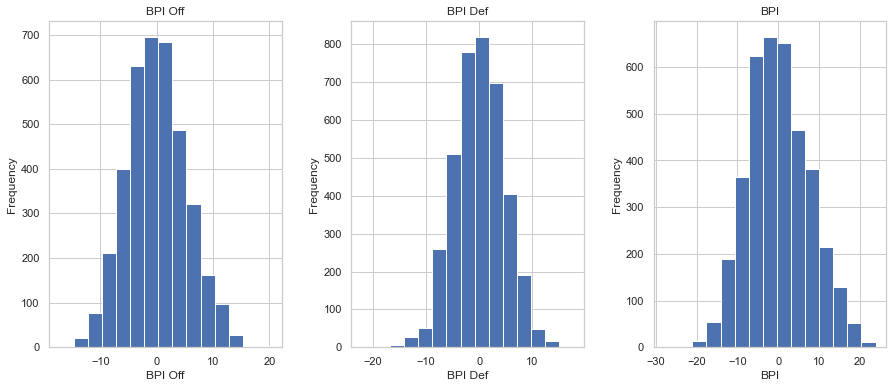

In [46]:
# Distributions of different BPI ratings over whole dataset

espn_bpi[['BPI Off', 'BPI Def', 'BPI']].hist(bins=15, figsize=(15, 6), layout=(1, 3))

# Formatting
plt.subplot(1, 3, 1)
plt.xlabel('BPI Off')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.xlabel('BPI Def')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.xlabel('BPI')
plt.ylabel('Frequency')
plt.show()

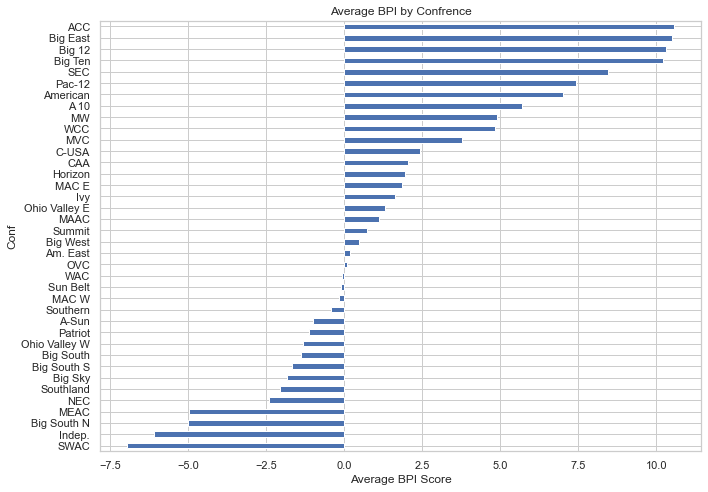

In [52]:
# Graph BPI by confrence

plt.figure(figsize=(10, 7))

# Plot the data
espn_bpi.groupby('Conf')['BPI'].mean().sort_values().plot(kind='barh')

# Formatting
plt.xlabel('Average BPI Score')
plt.title('Average BPI by Confrence')
plt.tight_layout()

plt.show()

Coercions?        Rk                    Team      Conf     W-L  BPI Off  BPI Def   BPI  \
108   109                  DePaul  Big East  19-Nov      5.8     -2.4   3.4   
110   111           South Florida  Big East  19-Dec      1.4      1.9   3.3   
138   139              St. John's  Big East  19-Nov     -4.0      5.5   1.5   
140   141                 Fordham      A 10  17-Dec     -2.8      4.2   1.4   
155   156                Michigan   Big Ten  22-Oct     -1.4      2.1   0.7   
...   ...                     ...       ...     ...      ...      ...   ...   
3814  347  Mississippi Valley St.      SWAC  28-Apr     -9.9     -6.5 -16.3   
3815  348             Chicago St.       WAC  29-Mar     -7.5     -9.0 -16.5   
3816  349            Delaware St.      MEAC  28-Apr     -9.4     -8.5 -18.0   
3817  350             Alabama A&M      SWAC  28-Mar    -11.7     -7.4 -19.1   
3818  351  Maryland-Eastern Shore      MEAC  25-Jul    -10.1     -9.5 -19.6   

      Year  Wins  Losses  
108   2008  1

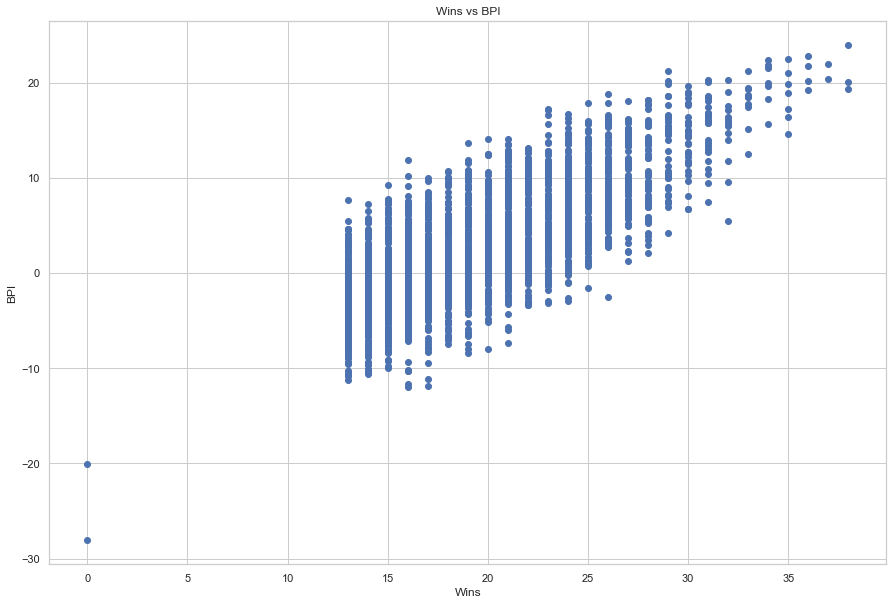

In [48]:
# Plot number of wins vs BPI

# Get individual Wins and Losses columns
espn_bpi[['Wins', 'Losses']] = espn_bpi['W-L'].str.split('-', expand=True)
espn_bpi['Wins'] = pd.to_numeric(espn_bpi['Wins'], errors='coerce')
espn_bpi['Losses'] = pd.to_numeric(espn_bpi['Losses'], errors='coerce')

# Check if there were any coercions to NaN, drop if so
print('Coercions?', (espn_bpi[espn_bpi['Wins'].isnull() | espn_bpi['Losses'].isnull()]))
espn_bpi.dropna(subset=['Wins', 'Losses'], inplace=True)

# Plot 
plt.figure(figsize=(15, 10))
plt.scatter(espn_bpi['Wins'], espn_bpi['BPI'])
plt.xlabel('Wins')
plt.ylabel('BPI')
plt.title('Wins vs BPI')
plt.show()

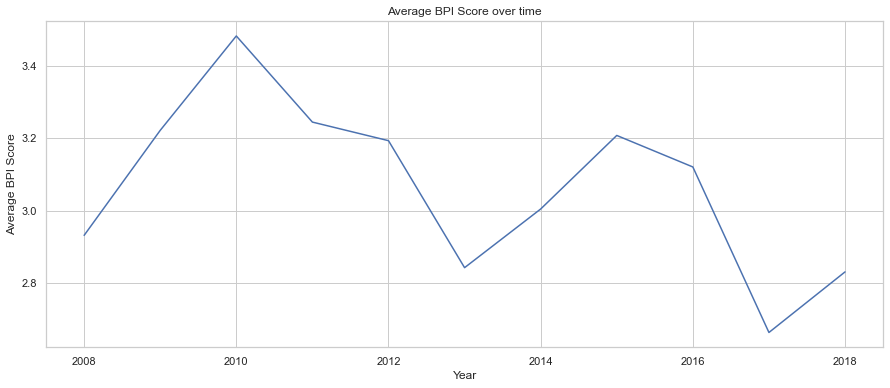

In [49]:
# Graph average BPI by year to see overall changes in BPI Ratings

espn_bpi.groupby('Year')['BPI'].mean().plot(kind='line', figsize=(15, 6))
plt.ylabel('Average BPI Score')
plt.title('Average BPI Score over time')
plt.show()

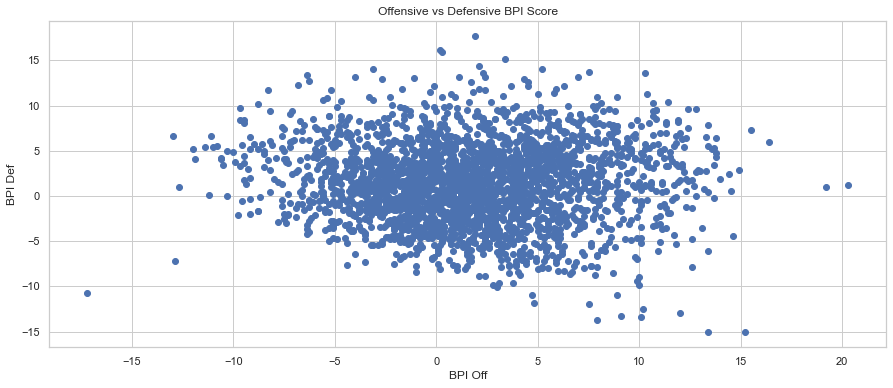

In [50]:
# Graph Offensive and Defensive BPI rating correlations

plt.figure(figsize=(15, 6))
plt.scatter(espn_bpi['BPI Off'], espn_bpi['BPI Def'])
plt.xlabel('BPI Off')
plt.ylabel('BPI Def')
plt.title('Offensive vs Defensive BPI Score')
plt.show()

Based on this simple EDA for ESPN data, we again see that BPI has at least some value in predicting the strength of teams, we now want to use these values as well to continue to imporve our model.

# Plan moving forward

Below is a diagram of how we plan to create our final model. Essentially, we want to use the Kaggle data, the ESPN and FiveThirtyEight data that we explored above, and evenutally individual player data from 247 sports to create a DF that has data by team, so that we can eventually predict on all possible matchups, as required by Kaggle.

We feel that we have a solid starting point from the Kaggle data that we can imporve on by implimenting this additional data.

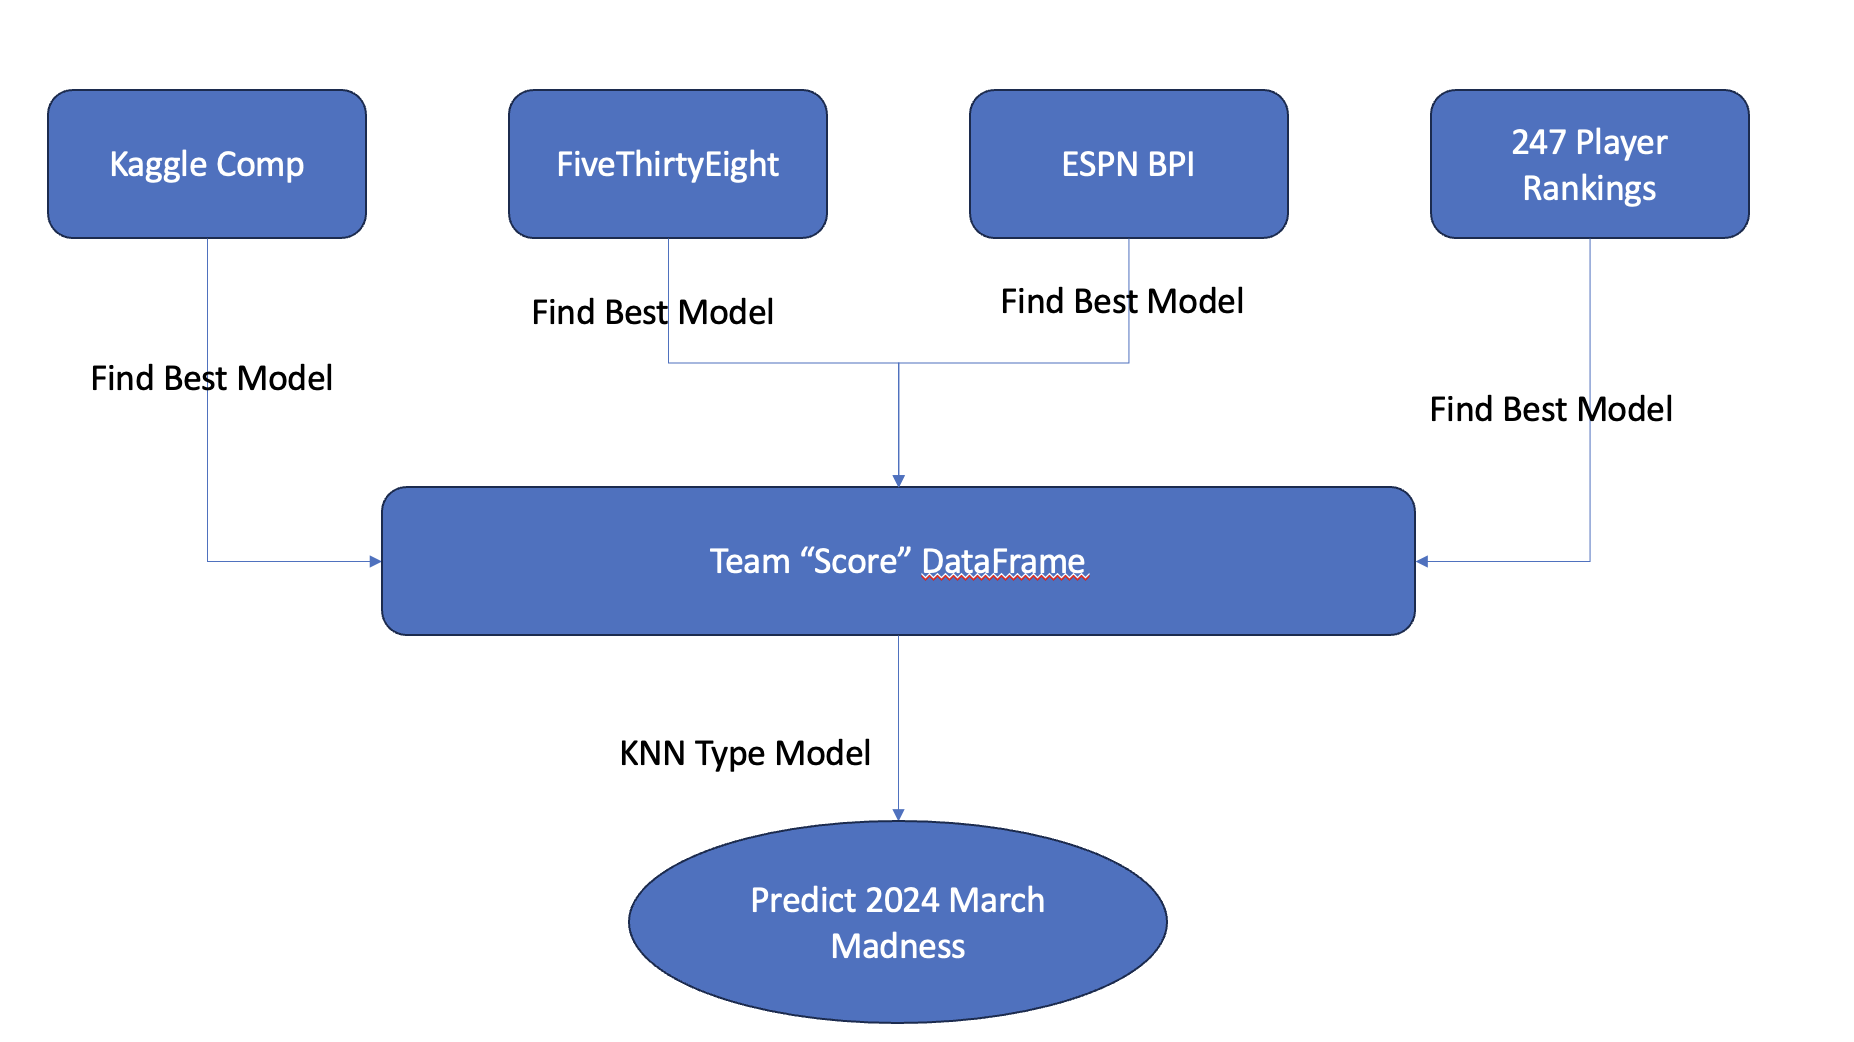